In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\addal\Documents\INTERNSHIP\Project 2\New folder\Cleaned_LoanData.csv")

In [3]:
df.head()

,CreditScore,FirstPaymentDate,FirstTimeHomebuyer,MaturityDate,MIP,Units,OCLTV,DTI,OrigUPB,LTV,...,Channel_C,Channel_R,Channel_T,DelinquencyCategory_0,DelinquencyCategory_1,DelinquencyCategory_2,RepaymentCategory_0,RepaymentCategory_1,RepaymentCategory_2,DelinquencyFlag
0,584,1999-04-01,0.0,2029-03-01,0,1,71,21,116000,71,...,0,0,1,0,0,1,1,0,0,0
1,584,1999-05-01,0.0,2029-04-01,0,1,79,28,96000,79,...,0,1,0,0,1,0,1,0,0,1
2,584,1999-05-01,0.0,2029-04-01,0,1,66,18,101000,66,...,0,1,0,0,0,1,0,1,0,0
3,584,1999-03-01,0.0,2029-02-01,0,1,65,25,66000,65,...,0,1,0,0,0,1,0,1,1,0
4,584,1999-03-01,0.0,2029-02-01,0,1,80,38,234000,80,...,0,0,1,0,0,1,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290262 entries, 0 to 290261
Data columns (total 42 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CreditScore                 290262 non-null  int64  
 1   FirstPaymentDate            290262 non-null  object 
 2   FirstTimeHomebuyer          290262 non-null  float64
 3   MaturityDate                290262 non-null  object 
 4   MIP                         290262 non-null  int64  
 5   Units                       290262 non-null  int64  
 6   OCLTV                       290262 non-null  int64  
 7   DTI                         290262 non-null  int64  
 8   OrigUPB                     290262 non-null  int64  
 9   LTV                         290262 non-null  int64  
 10  OrigInterestRate            290262 non-null  float64
 11  PropertyState               290262 non-null  object 
 12  OrigLoanTerm                290262 non-null  int64  
 13  NumBorrowers  

In [5]:
# Check unique values in each column to understand categorical features
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

CreditScore: 217 unique values
FirstPaymentDate: 66 unique values
FirstTimeHomebuyer: 2 unique values
MaturityDate: 96 unique values
MIP: 37 unique values
Units: 5 unique values
OCLTV: 102 unique values
DTI: 60 unique values
OrigUPB: 206 unique values
LTV: 97 unique values
OrigInterestRate: 254 unique values
PropertyState: 53 unique values
OrigLoanTerm: 61 unique values
NumBorrowers: 3 unique values
ServicerName: 20 unique values
EverDelinquent: 2 unique values
MonthsDelinquent: 173 unique values
MonthsInRepayment: 212 unique values
ComputedLoanTerm: 62 unique values
CreditScoreCategory: 4 unique values
DTICategory: 4 unique values
LoanRiskCategory: 4 unique values
LoanPurpose_P: 2 unique values
LoanPurpose_R: 2 unique values
Occupancy_INV: 2 unique values
Occupancy_PR: 2 unique values
Occupancy_SH: 2 unique values
PropertyType_Condo: 2 unique values
PropertyType_Multi-Family: 2 unique values
PropertyType_Other: 2 unique values
PropertyType_Single-Family: 2 unique values
Channel_B: 2 u

In [6]:
# 1. Applicant Information
"""Feature	                                       Reason it's important
Gender, Married, Dependents	                       May affect credit risk due to household responsibilities or income dependency
Education, Self_Employed	                         Education level and job type can indicate stability and earning potential
ApplicantIncome, CoapplicantIncome	               Crucial for assessing loan affordability"""

"Feature\t                                       Reason it's important\nGender, Married, Dependents\t                       May affect credit risk due to household responsibilities or income dependency\nEducation, Self_Employed\t                         Education level and job type can indicate stability and earning potential\nApplicantIncome, CoapplicantIncome\t               Crucial for assessing loan affordability"

In [7]:
# 3. Property & Collateral
#Feature	                                       Reason it's important
# Property_Area, Property_Value	                     Lenders often consider the location and value of property as security for the loan

In [8]:
#4. Target Variable
#Feature	                                       Reason it's important
#Loan_Status                                      	 This is what we aim to predict (binary classification)

In [9]:
# Separate column types
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Datetime Columns:", datetime_cols)

Numerical Columns: ['CreditScore', 'FirstTimeHomebuyer', 'MIP', 'Units', 'OCLTV', 'DTI', 'OrigUPB', 'LTV', 'OrigInterestRate', 'OrigLoanTerm', 'EverDelinquent', 'MonthsDelinquent', 'MonthsInRepayment', 'ComputedLoanTerm', 'LoanPurpose_P', 'LoanPurpose_R', 'Occupancy_INV', 'Occupancy_PR', 'Occupancy_SH', 'PropertyType_Condo', 'PropertyType_Multi-Family', 'PropertyType_Other', 'PropertyType_Single-Family', 'Channel_B', 'Channel_C', 'Channel_R', 'Channel_T', 'DelinquencyCategory_0', 'DelinquencyCategory_1', 'DelinquencyCategory_2', 'RepaymentCategory_0', 'RepaymentCategory_1', 'RepaymentCategory_2', 'DelinquencyFlag']
Categorical Columns: ['FirstPaymentDate', 'MaturityDate', 'PropertyState', 'NumBorrowers', 'ServicerName', 'CreditScoreCategory', 'DTICategory', 'LoanRiskCategory']
Datetime Columns: []


In [10]:
# Convert to datetime
df['FirstPaymentDate'] = pd.to_datetime(df['FirstPaymentDate'], errors='coerce')
df['MaturityDate'] = pd.to_datetime(df['MaturityDate'], errors='coerce')

# Confirm the change
df[['FirstPaymentDate', 'MaturityDate']].dtypes

FirstPaymentDate    datetime64[ns]
MaturityDate        datetime64[ns]
dtype: object

In [11]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print("Datetime Columns:", datetime_cols)

Datetime Columns: ['FirstPaymentDate', 'MaturityDate']


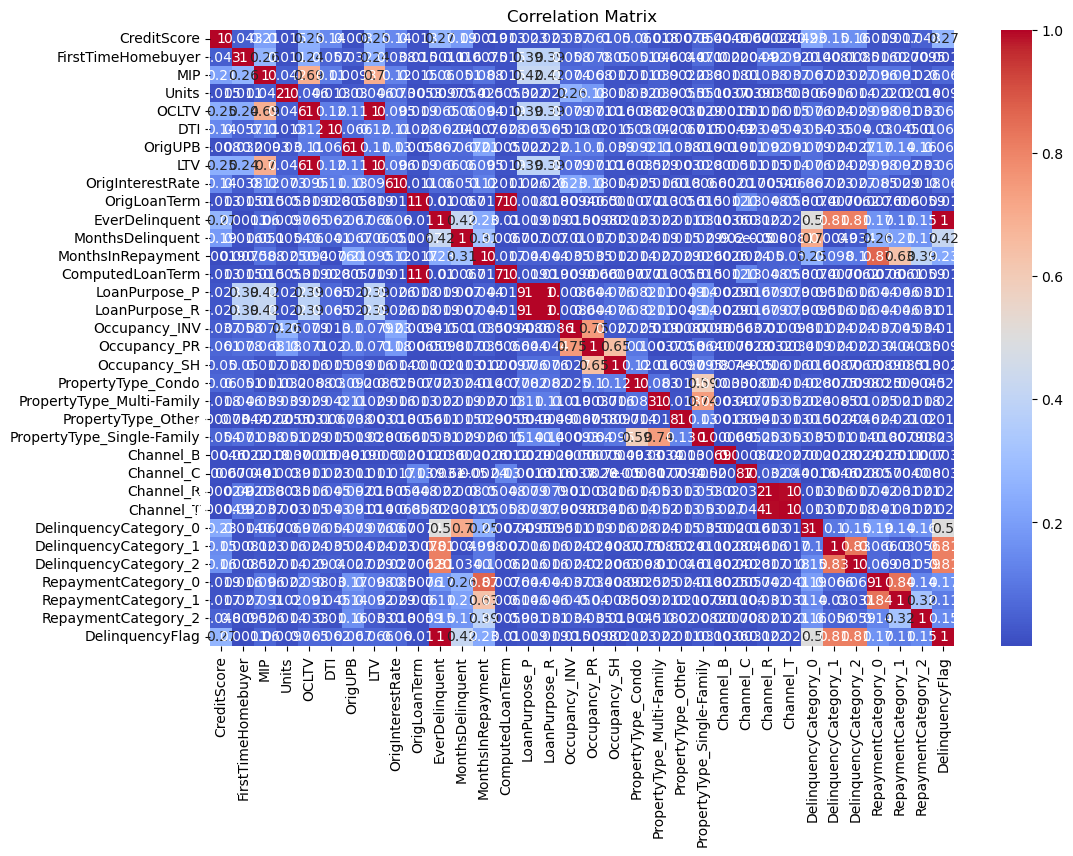

In [12]:
#Handle Multicollinearity
# Compute correlation matrix for numerical features
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr().abs()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Restore the target from original data
df['DelinquencyFlag'] = pd.read_csv(r"C:\Users\addal\Documents\INTERNSHIP\Project 2\New folder\Cleaned_LoanData.csv")['DelinquencyFlag']


In [14]:
#Feature Importance Technique:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=['DelinquencyFlag'])
y = df['DelinquencyFlag']

# Encode categorical features
# Exclude datetime columns from get_dummies
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

# Add numerical features back to the encoded dataframe
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
X_encoded = pd.concat([X_encoded, X[numerical_cols]], axis=1)

# Fit a random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_encoded, y)

# Get feature importances
rf_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

rf_importance.head(10)

,Feature,Importance
93,MonthsDelinquent,0.266977
92,EverDelinquent,0.261569
110,DelinquencyCategory_1,0.179141
111,DelinquencyCategory_2,0.173709
109,DelinquencyCategory_0,0.071356
82,CreditScore,0.008831
94,MonthsInRepayment,0.008471
73,CreditScoreCategory_Fair,0.007165
79,LoanRiskCategory_Low Risk,0.004674
112,RepaymentCategory_0,0.003854


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Use a pipeline with scaling + L1 regularized logistic regression
lasso = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
)
lasso.fit(X_encoded, y)

# Get coefficients
lasso_coef = lasso.named_steps['logisticregression'].coef_[0]
lasso_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Lasso Coef': lasso_coef
}).sort_values('Lasso Coef', key=abs, ascending=False)

lasso_df.head(10)

,Feature,Lasso Coef
93,MonthsDelinquent,6.712997
111,DelinquencyCategory_2,-5.101267
110,DelinquencyCategory_1,4.893267
92,EverDelinquent,1.780684
109,DelinquencyCategory_0,0.919240
82,CreditScore,-0.029996
94,MonthsInRepayment,0.024277
73,CreditScoreCategory_Fair,-0.021868
112,RepaymentCategory_0,0.008856
90,OrigInterestRate,0.003468


In [16]:
from sklearn.feature_selection import mutual_info_classif

# Separate features and target
X = df.drop(columns=['DelinquencyFlag'])
y = df['DelinquencyFlag']

# Encode categorical features
# Exclude datetime columns from get_dummies
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
X_encoded = pd.get_dummies(X[categorical_cols], drop_first=True)

# Add numerical features back to the encoded dataframe
# Exclude datetime columns from numerical features
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in df.select_dtypes(include=['datetime64']).columns]
X_encoded = pd.concat([X_encoded, X[numerical_cols]], axis=1)

# Compute mutual information
mi_scores = mutual_info_classif(X_encoded, y)

# Create DataFrame of scores
mi_df = pd.DataFrame({'Feature': X_encoded.columns, 'MI Score': mi_scores})
mi_df.sort_values('MI Score', ascending=False, inplace=True)
mi_df.head(10)

,Feature,MI Score
92,EverDelinquent,0.504193
93,MonthsDelinquent,0.497037
111,DelinquencyCategory_2,0.332447
110,DelinquencyCategory_1,0.286764
109,DelinquencyCategory_0,0.103490
99,Occupancy_PR,0.054303
91,OrigLoanTerm,0.054228
95,ComputedLoanTerm,0.051865
85,Units,0.049233
113,RepaymentCategory_1,0.046987


In [17]:
#Mathematical Transformations:
# Make a copy of the original DataFrame to avoid altering it directly
df_fe = df.copy()

# Example mathematical transformations

# 1. Debt-to-Income per Unit
df_fe['DTI_per_Unit'] = df_fe['DTI'] / df_fe['Units']

# 2. Loan-to-Value Ratio difference
df_fe['LTV_OCLTV_Diff'] = df_fe['LTV'] - df_fe['OCLTV']

# 3. MIP to OrigUPB ratio
df_fe['MIP_to_LoanAmt'] = df_fe['MIP'] / (df_fe['OrigUPB'] + 1)  # +1 to avoid divide by zero

# 4. Interest Rate weighted by Credit Score
df_fe['WeightedRate'] = df_fe['OrigInterestRate'] * df_fe['CreditScore']

# 5. OrigUPB to Loan Term (proxy for monthly principal)
df_fe['MonthlyPrincipal'] = df_fe['OrigUPB'] / (df_fe['OrigLoanTerm'] + 1)

# Display the new columns
df_fe[['DTI_per_Unit', 'LTV_OCLTV_Diff', 'MIP_to_LoanAmt', 'WeightedRate', 'MonthlyPrincipal']].head()


,DTI_per_Unit,LTV_OCLTV_Diff,MIP_to_LoanAmt,WeightedRate,MonthlyPrincipal
0,21.0,0,0.0,4015.0,321.329640
1,28.0,0,0.0,4015.0,265.927978
2,18.0,0,0.0,3942.0,279.778393
3,25.0,0,0.0,3869.0,182.825485
4,38.0,0,0.0,3942.0,648.199446


In [18]:
#Aggregations: Aggregate data to a different granularity level
# Convert FirstPaymentDate to datetime if it's not already
df["FirstPaymentDate"] = pd.to_datetime(df["FirstPaymentDate"], errors="coerce")

# Create a new column for year-month (monthly granularity)
df["PaymentYearMonth"] = df["FirstPaymentDate"].dt.to_period("M")

# Group by year-month and calculate aggregation metrics
aggregated_df = df.groupby("PaymentYearMonth").agg({
    "OrigUPB": "mean",             # Average Original Unpaid Principal Balance
    "CreditScore": "mean",         # Average Credit Score
    "DelinquencyFlag": "count"     # Count of loans issued that month
}).rename(columns={"DelinquencyFlag": "LoanCount"}).reset_index()

# Show the result
aggregated_df.head()

,PaymentYearMonth,OrigUPB,CreditScore,LoanCount
0,1999-01,126625.000000,716.000000,8
1,1999-02,119936.244541,710.538865,2290
2,1999-03,124571.725105,713.595770,89125
3,1999-04,124977.533040,711.854064,90800
4,1999-05,124321.863834,710.678947,103550


In [19]:
#Date and Time Features
# Ensure FirstPaymentDate is in datetime format
df["FirstPaymentDate"] = pd.to_datetime(df["FirstPaymentDate"], errors="coerce")

# Extract time-based features
df["PaymentYear"] = df["FirstPaymentDate"].dt.year
df["PaymentMonth"] = df["FirstPaymentDate"].dt.month
df["PaymentQuarter"] = df["FirstPaymentDate"].dt.quarter
df["PaymentDayOfWeek"] = df["FirstPaymentDate"].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Preview the new features
df[["FirstPaymentDate", "PaymentYear", "PaymentMonth", "PaymentQuarter", "PaymentDayOfWeek"]].head()

,FirstPaymentDate,PaymentYear,PaymentMonth,PaymentQuarter,PaymentDayOfWeek
0,1999-04-01,1999,4,2,3
1,1999-05-01,1999,5,2,5
2,1999-05-01,1999,5,2,5
3,1999-03-01,1999,3,1,0
4,1999-03-01,1999,3,1,0


In [20]:
# Convert date columns
df["FirstPaymentDate"] = pd.to_datetime(df["FirstPaymentDate"], errors="coerce")
df["MaturityDate"] = pd.to_datetime(df["MaturityDate"], errors="coerce")

# Create LoanAgeMonths as a domain-specific feature
df["LoanAgeMonths"] = ((df["MaturityDate"] - df["FirstPaymentDate"]) / pd.Timedelta(days=30)).round()

In [21]:
#Normalization:
from sklearn.preprocessing import MinMaxScaler

# Selecting a subset of numerical features to scale using MinMaxScaler
minmax_features = ["CreditScore", "OrigUPB", "DTI", "LoanAgeMonths"]

# Apply Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax_scaled = df[minmax_features].copy()
df_minmax_scaled[minmax_features] = minmax_scaler.fit_transform(df_minmax_scaled)

df_minmax_scaled.head()

,CreditScore,OrigUPB,DTI,LoanAgeMonths
0,0.0,0.395122,0.355932,0.983607
1,0.0,0.297561,0.474576,0.983607
2,0.0,0.321951,0.305085,0.983607
3,0.0,0.151220,0.423729,0.983607
4,0.0,0.970732,0.644068,0.983607


In [22]:
# Z-score Standardization
df_zscore_scaled = df[minmax_features].copy()
df_zscore_scaled = (df_zscore_scaled - df_zscore_scaled.mean()) / df_zscore_scaled.std()

df_zscore_scaled.head()

,CreditScore,OrigUPB,DTI,LoanAgeMonths
0,-2.539615,-0.165952,-0.685302,0.07186
1,-2.539615,-0.545562,-0.153377,0.07186
2,-2.539615,-0.450660,-0.913270,0.07186
3,-2.539615,-1.114978,-0.381344,0.07186
4,-2.539615,2.073749,0.606516,0.07186


In [23]:
# Log Transformation
log_features = ["OrigUPB", "LoanAgeMonths"]
df_log_transformed = df[log_features].copy()
df_log_transformed = np.log1p(df_log_transformed)

df_log_transformed.head()

,OrigUPB,LoanAgeMonths
0,11.661354,5.899897
1,11.472114,5.899897
2,11.522886,5.899897
3,11.097425,5.899897
4,12.363081,5.899897


In [24]:
# Polynomial Features:
poly_features = df[["CreditScore", "OrigUPB", "DTI"]].copy()

# Create polynomial and interaction terms
df_poly = pd.DataFrame()
df_poly["CreditScore^2"] = poly_features["CreditScore"] ** 2
df_poly["OrigUPB^2"] = poly_features["OrigUPB"] ** 2
df_poly["DTI^2"] = poly_features["DTI"] ** 2
df_poly["CreditScore*OrigUPB"] = poly_features["CreditScore"] * poly_features["OrigUPB"]
df_poly["CreditScore*DTI"] = poly_features["CreditScore"] * poly_features["DTI"]
df_poly["OrigUPB*DTI"] = poly_features["OrigUPB"] * poly_features["DTI"]

df_poly.head()

,CreditScore^2,OrigUPB^2,DTI^2,CreditScore*OrigUPB,CreditScore*DTI,OrigUPB*DTI
0,341056,13456000000,441,67744000,12264,2436000
1,341056,9216000000,784,56064000,16352,2688000
2,341056,10201000000,324,58984000,10512,1818000
3,341056,4356000000,625,38544000,14600,1650000
4,341056,54756000000,1444,136656000,22192,8892000


In [25]:
#  Quantile Transformation:
quantile_features = ["CreditScore", "OrigUPB", "DTI"]
df_quantile = df[quantile_features].copy()

# Apply rank transformation and scale to [0,1]
df_quantile = df_quantile.rank(method='average') / len(df_quantile)

df_quantile.head()


,CreditScore,OrigUPB,DTI
0,0.005138,0.492958,0.220139
1,0.005138,0.343824,0.408510
2,0.005138,0.386945,0.162057
3,0.005138,0.127798,0.317386
4,0.005138,0.959981,0.726490


In [26]:
# Robust Scaling:
robust_features = ["CreditScore", "OrigUPB", "DTI"]
df_robust_scaled = df[robust_features].copy()

# Median and IQR-based scaling
Q1 = df_robust_scaled.quantile(0.25)
Q3 = df_robust_scaled.quantile(0.75)
IQR = Q3 - Q1

df_robust_scaled = (df_robust_scaled - df_robust_scaled.median()) / IQR

df_robust_scaled.head()

,CreditScore,OrigUPB,DTI
0,-1.727273,-0.012987,-0.588235
1,-1.727273,-0.272727,-0.176471
2,-1.727273,-0.207792,-0.764706
3,-1.727273,-0.662338,-0.352941
4,-1.727273,1.519481,0.411765


In [27]:
# Max-Abs Scaling
maxabs_features = ["CreditScore", "OrigUPB", "DTI"]
df_maxabs_scaled = df[maxabs_features].copy()

# Divide each value by the maximum absolute value of its column
df_maxabs_scaled = df_maxabs_scaled / df_maxabs_scaled.abs().max()

df_maxabs_scaled.head()

,CreditScore,OrigUPB,DTI
0,0.73,0.483333,0.355932
1,0.73,0.400000,0.474576
2,0.73,0.420833,0.305085
3,0.73,0.275000,0.423729
4,0.73,0.975000,0.644068


In [28]:
from sklearn.decomposition import PCA

# Select numerical features and drop rows with NaNs
pca_features = df[["CreditScore", "OrigUPB", "DTI", "LoanAgeMonths", "LTV", "OCLTV"]].dropna()

# Standardize before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_features)

# Apply PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Convert to DataFrame
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.111665,-0.554109,-0.628519,1.024477,2.343482
1,-0.843240,-0.681368,-0.870486,1.286709,1.795550
2,0.396817,-0.480005,-0.861546,1.150005,2.463924
3,0.478533,-0.807516,-1.245799,1.642304,1.985449
4,-1.410811,-1.573951,1.357163,0.191821,2.204004


In [29]:
from sklearn.feature_selection import SelectKBest, chi2

# Prepare data: ensure all values are non-negative for chi2
chi_features = df[["CreditScore", "OrigUPB", "DTI", "LTV", "OCLTV"]].fillna(0)
target = df["DelinquencyFlag"].fillna(0).astype(int)

# Apply Chi-Square test
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(chi_features, target)

# Show scores
pd.Series(chi_selector.scores_, index=chi_features.columns).sort_values(ascending=False)

OrigUPB        2.937125e+07
CreditScore    7.401291e+04
DTI            6.528454e+03
LTV            3.771433e+03
OCLTV          3.752213e+03
dtype: float64

In [30]:
from sklearn.linear_model import LassoCV

# Fill missing values and scale
lasso_X = chi_features.copy()
lasso_y = target

# Fit LassoCV to select features
lasso = LassoCV(cv=5).fit(lasso_X, lasso_y)

# Display coefficients
pd.Series(lasso.coef_, index=lasso_X.columns).sort_values(ascending=False)


DTI            0.000000e+00
LTV            0.000000e+00
OCLTV          0.000000e+00
OrigUPB       -5.209531e-07
CreditScore   -1.558346e-03
dtype: float64

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use logistic regression with RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=3)
rfe.fit(lasso_X, lasso_y)

# Show selected features
pd.Series(rfe.support_, index=lasso_X.columns)


CreditScore     True
OrigUPB        False
DTI            False
LTV             True
OCLTV           True
dtype: bool

# XGBoost

In [32]:
!pip install --upgrade xgboost scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/a1/a6/c5b78606743a1f28eae8f11973de6613a5ee87366796583fb74c67d54939/scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl (11.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\addal\\anaconda3\\Lib\\site-packages\\~.learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [33]:
from xgboost import XGBClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

# Step 1: Initialize XGBoost Classifier as estimator
estimator = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Step 2: Apply RFE to select top 10 features
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(lasso_X, lasso_y)

# Step 3: Select features using the support mask
X = lasso_X.iloc[:, rfe.support_]
y = lasso_y

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


C:\Users\addal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train shape: (232209, 5)
Test shape: (58053, 5)


In [34]:
print(y.value_counts(normalize=True))

DelinquencyFlag
0    0.802461
1    0.197539
Name: proportion, dtype: float64


In [35]:
baseline_model =  XGBClassifier(max_iter=1000, class_weight='balanced')
baseline_model.fit(X_train, y_train)

C:\Users\addal\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:49:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "class_weight", "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_iter=1000,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)

In [36]:
#  Use your trained model, not the SMOTE object
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8042478424887602
ROC-AUC Score: 0.6887212215905312

 Confusion Matrix:
 [[46136   646]
 [10718   553]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.99      0.89     46782
           1       0.46      0.05      0.09     11271

    accuracy                           0.80     58053
   macro avg       0.64      0.52      0.49     58053
weighted avg       0.74      0.80      0.73     58053



# Smote

In [37]:
pip uninstall -y scikit-learn imbalanced-learn

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
Found existing installation: imbalanced-learn 0.11.0
Uninstalling imbalanced-learn-0.11.0:
  Successfully uninstalled imbalanced-learn-0.11.0
Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for imbalanced-learn==0.11.0 from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.


In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


In [40]:
#from xgboost import XGBClassifier
#from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')  # To ignore any warnings from XGBoost


In [41]:
# Step 5: Apply SMOTE on the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Original Training Set Shape:", X_train.shape, "→ Class distribution:", y_train.value_counts().to_dict())
print("Resampled Training Set Shape:", X_train_resampled.shape, "→ Class distribution:", y_train_resampled.value_counts().to_dict())

Original Training Set Shape: (232209, 5) → Class distribution: {0: 186142, 1: 46067}
Resampled Training Set Shape: (372284, 5) → Class distribution: {0: 186142, 1: 186142}


In [42]:
# Step 6: Train XGBoost on balanced data
baseline_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
baseline_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [43]:
# Step 7: Predict and evaluate
y_pred = baseline_model.predict(X_test)
y_prob = baseline_model.predict_proba(X_test)[:, 1]

In [44]:
# Evaluation
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print(" ROC-AUC Score:", roc_auc_score(y_test, y_prob))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 0.6691127073536252
 ROC-AUC Score: 0.6666928681194881

 Confusion Matrix:
 [[32456 14326]
 [ 4883  6388]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77     46782
           1       0.31      0.57      0.40     11271

    accuracy                           0.67     58053
   macro avg       0.59      0.63      0.59     58053
weighted avg       0.76      0.67      0.70     58053

